## Dependencias

In [17]:
import numpy as np
import pandas as pd
import datetime as datetime

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.feature_selection import f_regression, SelectKBest

import seaborn as sns
import cufflinks as cf
import matplotlib.pyplot as plt

cf.go_offline()
pd.set_option('display.max_columns',None)

## Lectura de datos

In [18]:
ruta='/home/oscarjarillo/Documentos/Análisis Multivariado/Regresión_Lineal/CarPrice_Assignment.csv'
df = pd.read_csv(ruta)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [19]:
for v in df.columns:
    if df[v].dtype=='object':
        for a,b in zip(list(df[v].unique()),range(0,len(list(df[v].unique()))+1)):
            df.loc[df[v]==a,v]=b
        df[v] = pd.to_numeric(df[v])

In [20]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,0,0,0,0,0,0,0,88.6,168.8,64.1,48.8,2548,0,0,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,1,0,0,0,0,0,0,88.6,168.8,64.1,48.8,2548,0,0,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,2,0,0,0,1,0,0,94.5,171.2,65.5,52.4,2823,1,1,152,0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,3,0,0,1,2,1,0,99.8,176.6,66.2,54.3,2337,2,0,109,0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,4,0,0,1,2,2,0,99.4,176.6,66.4,54.3,2824,2,2,136,0,3.19,3.40,8.0,115,5500,18,22,17450.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    int64  
 3   fueltype          205 non-null    int64  
 4   aspiration        205 non-null    int64  
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    int64  
 7   drivewheel        205 non-null    int64  
 8   enginelocation    205 non-null    int64  
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    int64  
 15  cylindernumber    205 non-null    int64  
 16  enginesize        205 non-null    int64  
 1

## Definición de variables

In [22]:
um = ['car_ID']
vart = ['price']
varc = [v for v in df.columns if v not in um and v not in vart]

## Análisis exploratorio

### Valores nulos

In [23]:
nulos = 1-df.describe().T[['count']]/len(df)
nulos

,count
car_ID,0.0
symboling,0.0
CarName,0.0
fueltype,0.0
aspiration,0.0
doornumber,0.0
carbody,0.0
drivewheel,0.0
enginelocation,0.0
wheelbase,0.0


### Selección de variables con mejor poder predictivo

In [24]:
X = df.copy()

In [25]:
sk = SelectKBest(k=len(varc),score_func=f_regression)
sk.fit(X[varc],X[vart[0]])

SelectKBest(k=24, score_func=<function f_regression at 0x7fa8cd1681f0>)

In [26]:
aux = pd.DataFrame(zip(varc,sk.scores_),columns=['var','score']).set_index('var').sort_values(by='score',
                                                                ascending=False).iplot(kind='bar',color='orange')

In [27]:
sk = SelectKBest(k=12,score_func=f_regression)
sk.fit(X[varc],X[vart[0]])

SelectKBest(k=12, score_func=<function f_regression at 0x7fa8cd1681f0>)

In [28]:
best = [a for a,b in zip(varc,sk.get_support()) if b]
best

['drivewheel',
 'enginelocation',
 'wheelbase',
 'carlength',
 'carwidth',
 'curbweight',
 'cylindernumber',
 'enginesize',
 'boreratio',
 'horsepower',
 'citympg',
 'highwaympg']

### Valores extremos

array([[<AxesSubplot:title={'center':'drivewheel'}>,
        <AxesSubplot:title={'center':'enginelocation'}>,
        <AxesSubplot:title={'center':'wheelbase'}>],
       [<AxesSubplot:title={'center':'carlength'}>,
        <AxesSubplot:title={'center':'carwidth'}>,
        <AxesSubplot:title={'center':'curbweight'}>],
       [<AxesSubplot:title={'center':'cylindernumber'}>,
        <AxesSubplot:title={'center':'enginesize'}>,
        <AxesSubplot:title={'center':'boreratio'}>],
       [<AxesSubplot:title={'center':'horsepower'}>,
        <AxesSubplot:title={'center':'citympg'}>,
        <AxesSubplot:title={'center':'highwaympg'}>]], dtype=object)

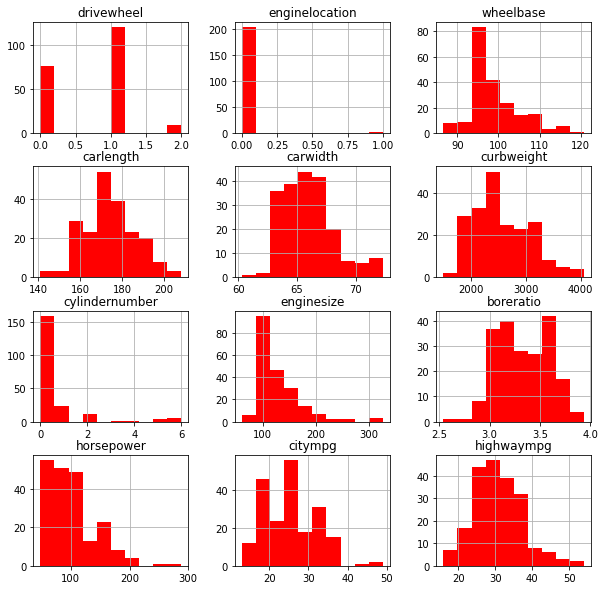

In [30]:
X[best].hist(figsize=(10,10),color='red')

In [32]:
for v,li,ls in X[best].describe(percentiles=[0.01,0.99]).T[['1%','99%']].reset_index().values:
    X[f'ex_{v}'] = ((X[v]<li)|(X[v]>ls)).astype(int)
X['ex_'] = X.filter(like='ex_').max(axis=1)
X['ex_'].value_counts(1)

0    0.892683
1    0.107317
Name: ex_, dtype: float64

In [33]:
X[um+vart] = df[um+vart]

In [34]:
X = X.loc[X['ex_']==0].drop(X.filter(like='ex_').columns,axis=1).reset_index(drop=True)

array([[<AxesSubplot:title={'center':'drivewheel'}>,
        <AxesSubplot:title={'center':'enginelocation'}>,
        <AxesSubplot:title={'center':'wheelbase'}>],
       [<AxesSubplot:title={'center':'carlength'}>,
        <AxesSubplot:title={'center':'carwidth'}>,
        <AxesSubplot:title={'center':'curbweight'}>],
       [<AxesSubplot:title={'center':'cylindernumber'}>,
        <AxesSubplot:title={'center':'enginesize'}>,
        <AxesSubplot:title={'center':'boreratio'}>],
       [<AxesSubplot:title={'center':'horsepower'}>,
        <AxesSubplot:title={'center':'citympg'}>,
        <AxesSubplot:title={'center':'highwaympg'}>]], dtype=object)

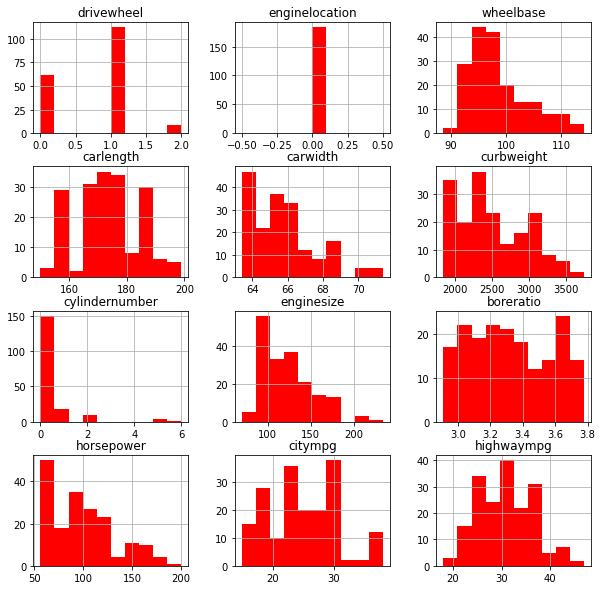

In [35]:
X[best].hist(figsize=(10,10),color='red')

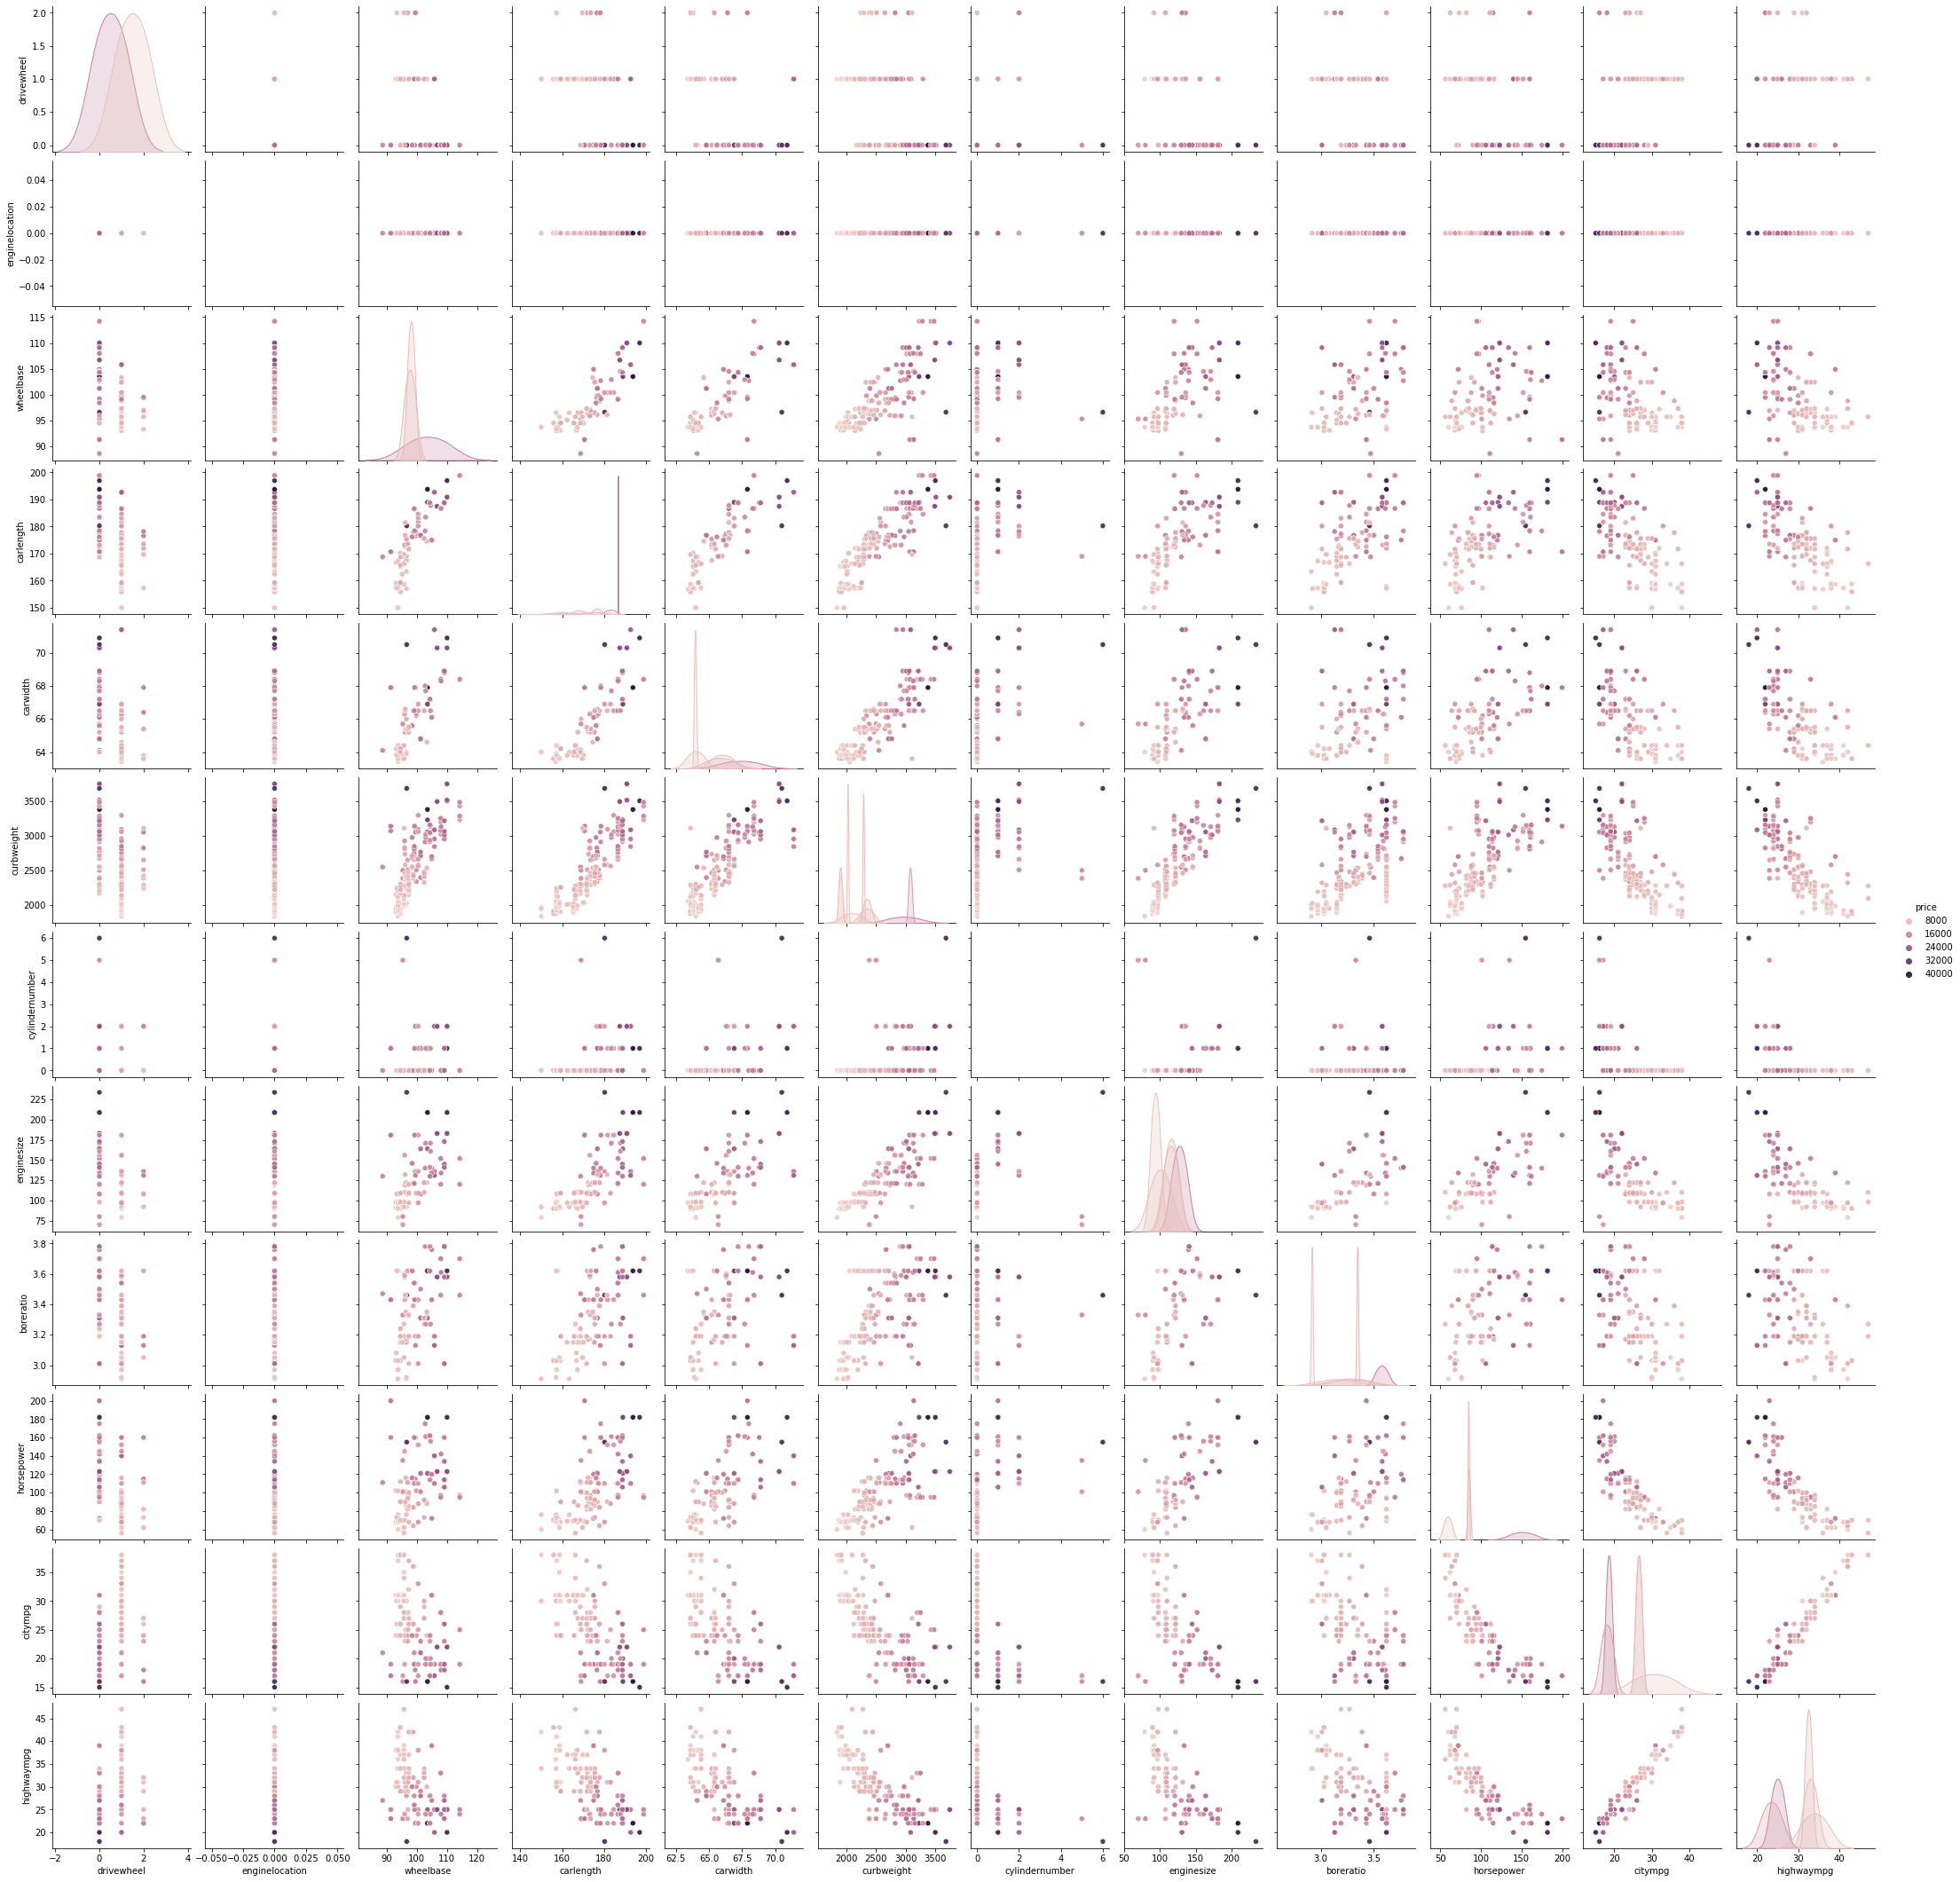

In [36]:
sns.pairplot(data=X[best+vart],hue=vart[0])

## Partición

In [37]:
Xt,Xv,yt,yv = train_test_split(X[um+best],X[um+vart],train_size=0.7)
Xt.reset_index(drop=True,inplace=True)
Xv.reset_index(drop=True,inplace=True)
yt.reset_index(drop=True,inplace=True)
yv.reset_index(drop=True,inplace=True)

## Aprendizaje

In [38]:
hp = dict(alpha = np.arange(0.1,2,0.1))

In [39]:
modelo = Ridge()

In [40]:
grid = GridSearchCV(param_grid=hp,
                   cv=5,
                   scoring='neg_mean_absolute_error',
                   n_jobs=-1,
                   verbose=True,
                   estimator=modelo)

In [42]:
grid.fit(Xt[best],yt[vart[0]])

Fitting 5 folds for each of 19 candidates, totalling 95 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9])},
             scoring='neg_mean_absolute_error', verbose=True)

In [43]:
grid.best_params_

{'alpha': 1.9000000000000001}

In [44]:
modelo = grid.best_estimator_
modelo

Ridge(alpha=1.9000000000000001)

In [46]:
modelo.fit(Xt[best],yt[vart[0]])

Ridge(alpha=1.9000000000000001)

In [47]:
modelo.coef_,modelo.intercept_

(array([ -702.38614914,     0.        ,   163.44783581,    -1.44839452,
          360.11677353,     2.92423504,  1400.26033665,    48.19927434,
        -1215.34738305,    54.96152042,   -24.99613005,   123.85969327]),
 -45236.24858140688)

## Validación del modelo

In [48]:
St = Xt.merge(yt,on=um,how='inner')
Sv = Xv.merge(yv,on=um,how='inner')

In [50]:
St['y^'] = modelo.predict(Xt[best])
Sv['y^'] = modelo.predict(Xv[best])

In [52]:
print(mean_absolute_error(y_pred=St['y^'],y_true=St[vart[0]]))
print(mean_absolute_error(y_pred=Sv['y^'],y_true=Sv[vart[0]]))

1883.9936144611963
1791.6584328480071


<AxesSubplot:ylabel='Density'>

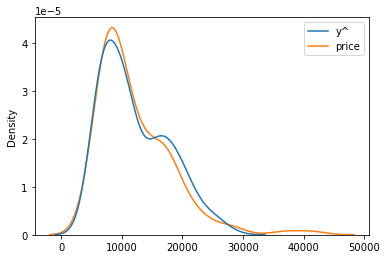

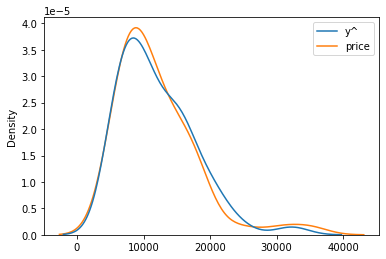

In [53]:
plt.figure()
sns.kdeplot(data=St[['y^']+vart])
plt.figure()
sns.kdeplot(data=Sv[['y^']+vart])